# PIVPy example

In [1]:
import os, sys
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# sys.path.append('../../')

In [3]:
from pivpy import io, graphics, pivpy

In [4]:
filename = '../data/Run000001.T000.D000.P000.H001.L.vec'
data = io.loadvec(filename)

Run000001.T000.D000.P000.H001.L.vec 1


In [5]:
data.attrs

OrderedDict([('variables', ['X', 'Y', 'U', 'V', 'CHC']),
             ('units', ['mm', 'mm', 'm/s', 'm/s']),
             ('dt', 2000.0)])

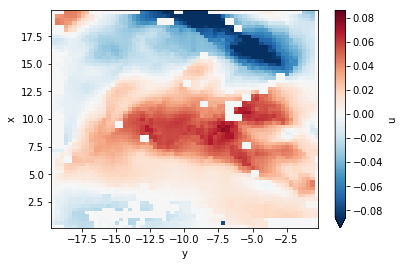

In [6]:
data['u'].plot(robust=True)

In [7]:
# data.to_netcdf('test.nc')

In [8]:
data.u.shape

(1, 63, 63)

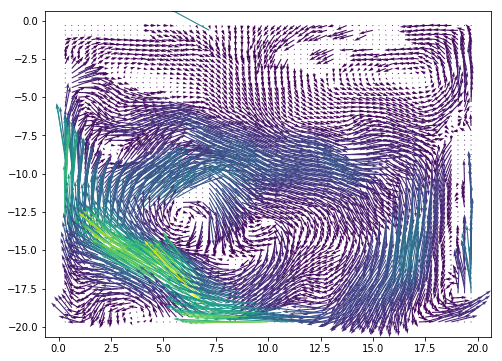

In [9]:
plt.figure(figsize=(8,6))
plt.quiver(data.x,data.y,data.u[0,:,:], data.v[0,:,:] ,data.u[0,:,:]**2 + data.v[0,:,:]**2,scale=.75)

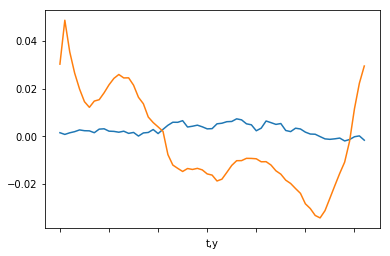

In [10]:
# profile along y
data.mean(dim='x').to_dataframe()['u'].plot()
data.mean(dim='x').to_dataframe()['v'].plot()

In [11]:
data  = io.load_directory('../data')

Run000001.T000.D000.P000.H001.L.vec 1


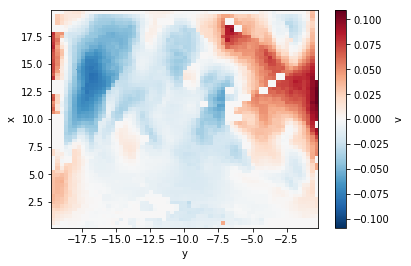

In [12]:
data.isel(t=0)['v'].plot()

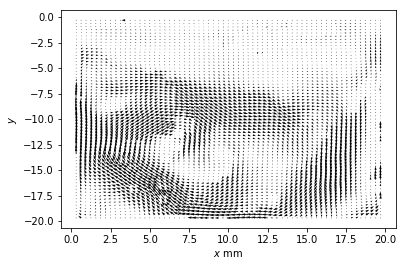

In [25]:
plt.quiver(data['x'],data['y'],data.u.mean(dim='t'),data.v.mean(dim='t'))
plt.xlabel('$x$ ' + data.attrs['units'][0]);
plt.ylabel('$y$');

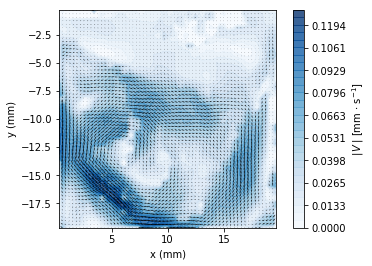

In [27]:
graphics.quiver(data.piv.average,units = data.attrs['units']);

In [28]:
# equivalent to averf 
graphics.showf(data.mean(dim='t'),variables = data.attrs['variables'], units=data.attrs['units'])

KeyError: 't'

<Figure size 432x288 with 0 Axes>